# KNN and Perceptron Homework

## Overview 
***


In this homework you will implement a prototype-based k-NN and a Perceptron classifier. For the Perceptron classifier, you will implement the learning algorithm described in class.

Here are the rules: 

- If you want to load a different Python library, you should check with the staff first (ask on Piazza).
- Don't change function signatures / APIs. Be sure to add code only where "your code here" is listed. If you need additional scratch space, you can add code in the areas marked by `# scratch space`. 
- For the Math problems, you will enter your answer as a multiple choice response in a code cell block. Ensure you format your answer as described in the problem.

### Linear Algebra - 10 points
***
Given matrix:

$$
\begin{equation*}
\mathbf{A} = \begin{bmatrix}2 & -1 & 0\\-1 & 2 & -1\\ 0 & -1 & 2\end{bmatrix}
\end{equation*}
$$

Answer the following questions:

**1.** Are the vectors $\begin{equation*} \mathbf{x} = \begin{bmatrix}2\\-1\\0\end{bmatrix}, \mathbf{y} = \begin{bmatrix}-1 \\ 2 \\ -1\end{bmatrix}, \mathbf{z} = \begin{bmatrix}0 \\ -1 \\2\end{bmatrix} \end{equation*}$ linearly independent? Input answer should be "yes" or "no".

In [1]:
prob1_answer = ""

### BEGIN SOLUTION
prob1_answer = "yes"
### END SOLUTION

In [2]:
### BEGIN HIDDEN TESTS
'''The vectors are linearly independent. This can be shown by either solving the system of linear equations $a\mathbf{x} + b\mathbf{y} + c\mathbf{z} = 0$, which has only one solution: $a = b = c = 0$, or by calculating the determinant of the matrix $A$ (since the columns are linearly independent, the determinant must be nonzero).

**2-point**'''
assert(prob1_answer == "yes")
### END HIDDEN TESTS

**2.** Which of the following is an eigenvector of $\mathbf{A}$? 

a. $\begin{bmatrix}1\\-\sqrt{2}\\1\end{bmatrix}$

b. $\begin{bmatrix}1\\1\\1\end{bmatrix}$

c. $\begin{bmatrix}1\\\sqrt{2}\\-1\end{bmatrix}$

d. $\begin{bmatrix}-1\\0\\1\end{bmatrix}$

Input your answer as either `"a"`, `"b"`, `"c"`, or `"d"`.

In [3]:
prob2_answer = ""

### BEGIN SOLUTION
prob2_answer = ["a". "d"]
'''

The problem was worded incorrectly. credit given for a,d, or a and d
1 pt
'''
### END SOLUTION

In [4]:
# Do not remove this cell.
### BEGIN HIDDEN TESTS
assert(prob2_answer == "a")
### END HIDDEN TESTS

**3.** Let $M$ be any matrix with real entries. $M$ is *positive semidefinite* if, for any vector $x$ with real components, the dot product of $Mx$ and $x$ is nonnegative, $\langle Mx, x \rangle \geq 0$

Let $B = \begin{bmatrix}1 & 2\\-2 & 1\end{bmatrix}$. 

Is B positive semidefinite? Enter your answer as "yes" or "no".

Hint: Write out the equation for $x^TBx$.

In [5]:
prob3_answer = ""

### BEGIN SOLUTION
prob3_answer = "yes"
'''

You can write out the equation and it will come out to a some of squares.
1 pt

'''
### END SOLUTION

In [6]:
# Do not remove this cell.

### BEGIN HIDDEN TESTS
assert(prob3_answer == "yes")
### END HIDDEN TESTS

**4.** A *symmetric* matrix $H$ is positive semidefinite if and only if the eigenvalues of $H$ are all non-negative. Is matrix $A$ positive semidefinite? Why?

In [7]:
prob4_answer = ""

### BEGIN SOLUTION
'''
1 pt for correct answer, 1 pt for explanation (all the eigen values are non negative or something similar)

'''
prob4_answer = "yes"
### END SOLUTION

In [8]:
# Do not remove this cell.

### BEGIN HIDDEN TESTS
assert(prob4_answer == "yes")
### END HIDDEN TESTS

$$
\begin{bmatrix}
a & b & c
\end{bmatrix}
*
\begin{bmatrix}
    2       & -1  & 0 \\
   -1       &  2  & -1 \\
    0 .     & -1  & 2 & 
\end{bmatrix}
*
\begin{bmatrix}
a\\
b\\
c
\end{bmatrix}
$$

### Prototype Based K-NN - 10 points

In this problem you will implement a prototype-based k-NN classifier to take an image of a handwritten digit and predict the label of the digit.

In [9]:
import numpy as np
import matplotlib.pylab as plt
import pickle
import gzip
from sklearn.datasets import fetch_openml, load_iris
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [10]:
# This cell downloads the mnist dataset, converts the labels to numeric
# format, and splits into train/test. Do not modify. It may take 1-2 minutes
# if the network connection is slow.

class Numbers:
    """
    Class to store MNIST data
    """
    def __init__(self, location):
        # store for use later  
        X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
        
        # Convert the labels to numeric labels
        labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
        for idx, l in enumerate(labels):
            y[y == l] = idx
        y = y.astype(np.int32)
            
                        
        self.train_x, self.train_y = X[:50000,:], y[:50000]

        self.test_x, self.test_y = X[60000:,:], y[60000:]
        
DATA_PATH = "mnist.pklz"
data = Numbers(DATA_PATH)

In [11]:
assert(data.train_x.dtype == np.float64)
assert(data.train_y.dtype == np.int32)

The class above will load and store the MNIST data.  Run the above cells then fill in
the code in the immediate cell below to calculate: 
- The number of examples in the training set 
- The number of examples in the test set 
- The number of pixels in each image. 

In [12]:
# Here are the numbers you need to provide here:
num_training_examples = 0
num_test_examples = 0
pixels_per_image = 0

### BEGIN SOLUTION
num_training_examples = data.train_x.shape[0]
num_test_examples = data.test_y.shape[0]
pixels_per_image = np.prod(data.train_x[0,:].shape)
### END SOLUTION

In [13]:
# Do not remove this cell.

### BEGIN HIDDEN TESTS
print(data.train_x.shape[0])
print(data.test_y.shape)
print(data.train_x[0].shape)
assert(num_training_examples == 50000)
assert(num_test_examples == 10000)
assert(pixels_per_image == 784)
### END HIDDEN TESTS

50000
(10000,)
(784,)


### Dataset Exloration

In the cell below, write some code to explore the data. For example, you might plot the number of examples for each class (0-9) as a histogram. A desireable property of a dataset is for it to have a roughly balanced number of examples per class.

In [14]:
# Write your exploration code here (scratch space)

### BEGIN SOLUTION
# Full points if student has 1-2 plots here
### END SOLUTION

The cells below build a K-Nearest Neighbor classification on the handwritten digit data similar to how we explored KNN for the Iris dataset in our in-class notebooks. However, we will introduce a second parameter besides `k`. Instead of running the nearest-neighbor search on the whole dataset, which would be computationally intensive, we will select a subset of points called "prototypes" to conduct the nearest neighbor search. We will explore the effect of `k` and `p` on performance.

Follow the prompts and implement the following functions. We provide some "sanity check" tests, but these tests are not exhaustive. You can write additional code to check your functions in the scratch space. Your code will be tested against other test cases which are hidden.

1. Write the function `select_prototypes` that selects prototype examples randomly from a dataset.

Hint/warning: If you use the `np.random.choice function`, be sure to inspect the `replace` argument.

In [15]:
def select_prototypes(X_train, y_train, num_prototypes : int):
    '''
    Given a matrix X_train and y_train,
    return two matrixes X_train_proto and y_train_proto
    that contain a subset of the data given (a subset of the rows),
    where the subset is of size num_prototypes.
    
    Note that you must use the same subset indices for X_train and y_train
    
    Args: X_train (np.ndarray) - the dataset (training data)
          y_train (np.ndarray) - the dataset (labels)
          num_prototypes (int)
          
    Returns: 
          X_train_proto (np.ndarray) a subset of the dataset rows
          y_train_proto (np.ndarray) a subset of the labels
    '''
    X_train_proto = X_train
    y_train_proto = y_train
    
    ### BEGIN SOLUTION
    indices = np.random.choice(X_train_proto.shape[0], num_prototypes, replace=False)
    X_train_proto = X_train.take(indices, axis=0)
    y_train_proto = y_train.take(indices, axis = 0)
    ### END SOLUTION
    return X_train_proto, y_train_proto

# scratch space

In [16]:
test_X = np.array([[1,2],[3,4]])
test_Y = np.array([1, -1])
X_test_proto, y_test_proto = select_prototypes(test_X, test_Y, 1)
assert( type(X_test_proto) == np.ndarray )
assert( type(y_test_proto) == np.ndarray)
assert( X_test_proto.shape[0] == 1)
assert( y_test_proto.shape[0] == 1)

### BEGIN HIDDEN TESTS
'''
-1 pt if they forgot replace=False
'''
### END HIDDEN TESTS

2. Write the build_model function, which returns a KNeighborsClassifier from Scikit-Learn. This is similar to what we did in class, except we should also use the `select_protytpes` function. 

For full points you must:

a. **Use the select_prototypes function on the input X_train and y_train**

b. **Use the ball tree algorithm for your KNeighborsClassifier**

In [17]:

def build_model(X_train : np.ndarray, y_train : np.ndarray, 
                num_neighbors: int, num_prototypes : int):
    '''
    Builds and returns a KNearestClassifier model, the model 
    
    (Use your select_prototypes function in this function)
     
    Args:
        X_train: (np.ndarray) the data to fit
        y_train: (np.ndarray) the labels
        num_neighbors: (int) the number of nearest neighbors
        num_prototypes: (int) the number of prototypes
        
    Returns:
        knn_model - KNeighborsClassifier, fitted to the prototypes
        X_train_proto - (np.ndarray) the new prototype data points
        y_train_proto - (np.ndarray) the new prototype labels
    '''
    knn_model = None
    X_train_proto = X_train
    y_train_proto = y_train
    ### BEGIN SOLUTION
    knn_model = KNeighborsClassifier(num_neighbors, algorithm='ball_tree')
    X_train_proto, y_train_proto = select_prototypes(X_train, y_train, num_prototypes)
    knn_model.fit(X_train_proto, y_train_proto)
    ### END SOLUTION
    return knn_model, X_train_proto, y_train_proto


# scratch space

3. Write the `get_confusion_matrix` function. 

**You must calculate the confusion matrix manually (using Numpy functions) rather than using the Scikit-Learn confusion matrix function. You will get zero-points if you use the Scikit-Learn function.**

In [18]:

def get_confusion_matrix(y_true : np.ndarray, 
                         y_predicted : np.ndarray, 
                         classes : np.ndarray):
    '''
    Args:
        y_true: numpy array, true labels of the data set
        y_predicted: numpy array, predicted labels on the same dataset as the true labels
        classes: numpy array containing the classes (in the case of mnist, this is 
                  a vector of numbers from 0 to 9). this must be a 1-dimensional vector.
    
    Build the confusion matrix from scratch (without using the version
    provided by Sk-learn)
    
    Returns:
    
        conf_matrix : (np.ndarray) the calculated confusion matrix
    
    
    Hint: Easiest way is to use two nested for-loops
    '''
    conf_matrix = np.zeros((classes.shape[0], classes.shape[0]))
    
    ### BEGIN SOLUTION
    for i in classes.tolist():
        curr_num_mask = (y_true == i)
        relevant_labels_true = y_true[curr_num_mask]
        relevant_labels_predicted = y_predicted[curr_num_mask]
        for j in classes.tolist():
            conf_matrix[i,j] = np.sum(relevant_labels_predicted == j)
    ### END SOLUTION
    
    return conf_matrix

# scratch space

In [19]:
true_y = np.array([0, 0, 1, 2, 3, 4, 4])
pred_y = np.array([0,1,1,3,3,5,5])
classes = np.array([0,1,2,3,4,5])
conf_matrix = get_confusion_matrix(true_y, pred_y, classes)

assert(type(conf_matrix)==np.ndarray)
assert((conf_matrix.shape[0] == conf_matrix.shape[1] == 6))
assert(conf_matrix[5,:].sum() == 0)
assert(conf_matrix[4,5] == 2)

In [20]:
def get_accuracy(confusion_matrix : np.ndarray):
    '''
    Args:
        confusion_matrix : (np.ndarray) output of get_confusion_matrix
    Returns:
        The accuracy of your classifier (Numpy float)
    '''
    acc = 0.0
    
    ### BEGIN SOLUTION
    total = confusion_matrix.sum()
    acc = np.diag(confusion_matrix).sum()/total
    ### END SOLUTION
    
    
    return acc

# Scratch space

In [21]:
test_matrix1 = np.array([[1,0,1],[0, 2, 0], [0,0,1]])
test_matrix2 = np.array([[0,0,0],[0,1,0], [0,0,5]])
assert(get_accuracy(test_matrix1) == .8)
assert(get_accuracy(test_matrix2) == 1)
assert(type(get_accuracy(test_matrix1))==np.float64)

In [22]:
# Do not delete this cell.

### BEGIN HIDDEN TESTS
import unittest

class TestKnn(unittest.TestCase):
    def setUp(self):
        self.x = np.array([[2, 0], [4, 1], [6, 0], [1, 4], 
                           [2, 4], [2, 5], [4, 4], [0, 2], 
                           [3, 2], [4, 2], [5, 2], [5, 5]])
        self.y = np.array([+1, +1, +1, +1, 
                           +1, +1, +1, -1, 
                           -1, -1, -1, -1])
        self.knn = {}
        self.proto_x = {}
        self.proto_y = {}
        for ii in [1, 2, 3]:
            self.knn[ii], self.proto_x[ii], self.proto_y[ii] = build_model(self.x, self.y, ii, self.x.shape[0])

        self.queries = np.array([[1, 5], [0, 3], [6, 4]])
        self.queries = self.queries.reshape((-1, 1, 2))

    def test1(self):
        """
        Test 1NN
        """
        ans_1 = [1, -1, -1]
        for idx, q in enumerate(self.queries):
            d, ind = self.knn[1].kneighbors(q)
            print("Nearest to {} is {}, label {} dist {}".format(q, self.proto_x[1][ind, :], self.proto_y[1][ind], d))
            self.assertEqual(self.knn[1].predict(q)[0],  ans_1[idx])

    def test2(self):
        """
        Test 2NN
        """
        ans_2 = [1, -1, -1]
        for idx, q in enumerate(self.queries):
            d, ind = self.knn[2].kneighbors(q)
            print("Nearest to {} is {}, label {} dist {}".format(q, self.proto_x[2][ind, :], self.proto_y[2][ind],d ))
            self.assertEqual(self.knn[2].predict(q)[0],  ans_2[idx])

    def test3(self):
        """
        Test 3NN
        """
        ans_3 = [1, 1 , -1]
        for idx, q in enumerate(self.queries):
            d, ind = self.knn[3].kneighbors(q)
            print("Nearest to {} is {}, label {} dist {}".format(q, self.proto_x[3][ind, :], self.proto_y[3][ind], d))
            self.assertEqual(self.knn[3].predict(q)[0], ans_3[idx])
        
tests = TestKnn()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)
### END HIDDEN TESTS

...

Nearest to [[1 5]] is [[[1 4]]], label [[1]] dist [[1.]]
Nearest to [[0 3]] is [[[0 2]]], label [[-1]] dist [[1.]]
Nearest to [[6 4]] is [[[5 5]]], label [[-1]] dist [[1.41421356]]
Nearest to [[1 5]] is [[[2 5]
  [1 4]]], label [[1 1]] dist [[1. 1.]]
Nearest to [[0 3]] is [[[0 2]
  [1 4]]], label [[-1  1]] dist [[1.         1.41421356]]
Nearest to [[6 4]] is [[[5 5]
  [4 4]]], label [[-1  1]] dist [[1.41421356 2.        ]]
Nearest to [[1 5]] is [[[2 5]
  [1 4]
  [2 4]]], label [[1 1 1]] dist [[1.         1.         1.41421356]]
Nearest to [[0 3]] is [[[0 2]
  [1 4]
  [2 4]]], label [[-1  1  1]] dist [[1.         1.41421356 2.23606798]]
Nearest to [[6 4]] is [[[5 5]
  [4 4]
  [5 2]]], label [[-1  1 -1]] dist [[1.41421356 2.         2.23606798]]



----------------------------------------------------------------------
Ran 3 tests in 0.014s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

### k-NN Analysis

We will now use our k-NN classifier on the MNIST dataset that we loaded above. We will explore the relationship between the test accuracy and:

1. The number of training examples (before selecting prototypes)
2. The number of nearest neighbors ($k$)
3. The number of prototypes ($p$)



**Part A:** Suppose we fix the number of prototypes, $p$ to be to 1000 and $k=10$. However, let us also suppose that our original dataset was a different size. Fill in the function below that repeatedly builds your model using a subset of the training data (keeping the number of prototypes fixed to be `1000`. Your subsets of the training datashould be of size 20%, 40%, 60%, 80%, and 100% (this is filled in for you).  Then, fill in the next cell to produce a plot that shows the trend exploring the performance.

Note that the code builds a dictionary `performance_dict` with the following format:
```
{
  [number of training examples]: [test set accuracy] (in decimal format)
}
```

In [23]:
training_percents = np.array([0.01, 0.05, 0.1, 0.2, 0.4, 0.8, 1.0])
k = 10
num_proto = 500
performance_dict = {}
original_size = data.train_x.shape[0] 

for trng_percent in training_percents:
    ### BEGIN SOLUTION
    # Build the model.
    subset_size = int(trng_percent * original_size)
    subset_x, subset_y = select_prototypes(data.train_x, data.train_y, subset_size)
    
    print("Building model.")
    model, x_proto, y_proto = build_model(subset_x, 
                                          subset_y, 
                                           k, num_proto)

    # Make predictions on test set.
    print("Making predictions on test set (size: {})".format(data.test_x.shape))
    pred_y = model.predict(data.test_x)

    # Create confusion matrix
    print("Generating confusion matrix.")
    confusion_matrix = get_confusion_matrix(data.test_y, pred_y, np.arange(10))

    # Get accuracy
    print("Storing results.")
    acc = get_accuracy(confusion_matrix)
    performance_dict[trng_percent] = acc
    ### END SOLUTION
    
    print ("k: {}, p: {}, training set size: {}, Accuracy : {}".format(k, num_proto, subset_size,
                                                                       100 * performance_dict[trng_percent]))

Building model.
Making predictions on test set (size: (10000, 784))
Generating confusion matrix.
Storing results.
k: 10, p: 500, training set size: 500, Accuracy : 81.83
Building model.
Making predictions on test set (size: (10000, 784))
Generating confusion matrix.
Storing results.
k: 10, p: 500, training set size: 2500, Accuracy : 77.91
Building model.
Making predictions on test set (size: (10000, 784))
Generating confusion matrix.
Storing results.
k: 10, p: 500, training set size: 5000, Accuracy : 80.83
Building model.
Making predictions on test set (size: (10000, 784))
Generating confusion matrix.
Storing results.
k: 10, p: 500, training set size: 10000, Accuracy : 80.41
Building model.
Making predictions on test set (size: (10000, 784))
Generating confusion matrix.
Storing results.
k: 10, p: 500, training set size: 20000, Accuracy : 82.69
Building model.
Making predictions on test set (size: (10000, 784))
Generating confusion matrix.
Storing results.
k: 10, p: 500, training set si

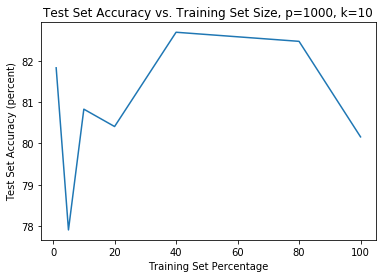

In [24]:
# Plot your graph exploring the relationship between the training set size and performance for k=10, p=1000.
# Remember that the following things are required for each graph: x/y axes labels, title, legend (if multiple data 
# series)

### BEGIN SOLUTION
'''
Plots will look different for people who did certain things at the top (ie.e. changed p to 1000 because
of the instructions, etc.)

we're reasonable in the grading for these situations, unless you did something completely wrong.

We subtracted -1 pt for taking non-random subsets
'''

x_val = list(performance_dict.keys())
x_val = [x*100 for x in x_val]
y_val = [performance_dict[p]*100 for p in performance_dict]

plt.plot(x_val, y_val)
plt.title("Test Set Accuracy vs. Training Set Size, p=1000, k=10")
plt.xlabel("Training Set Percentage")
plt.ylabel("Test Set Accuracy (percent)")
plt.show()

### END SOLUTION

Write your analysis here (2-3 sentances). No more than a short paragraph.

### BEGIN SOLUTION

1 pt- analysis matches graph
1 pt - explain WHY the graph looks that way (i.e. the subsets all contain enough points that drawing p prototypes still creates  a representative set of prototypes for the algorithm. The absolute variation is pretty small, indicating that the change in error rate is actually coming from the randomness of the prototypes.

We are reasonable giving points where analysis looks pretty reasonable. It doesn't have to be exactly that.

-1 pt if the analysis onlys describes the graph rather than explanining why. i.e. "It goes down, then it went up, then down. Best is at about 40%" woudl get -1pt

### END SOLUTION

**Part B:** Now suppose we use the entire training set to fit the classifier, and still fix $p=1000$. Explore the relationship between the number of nearest neighbors ($k$) and accuracy on the test set.

The procedure is the same as part A: Fill in the code to build and test the models, fill in the code to plot the graph, then write your explanation/analysis.

In [25]:
k_vals = [1, 5, 11, 21, 41, 81]
num_proto = 1000
performance_dict = {}


for k in k_vals:
    ### BEGIN SOLUTION
    # Build the model.
    print("Building model k = {}".format(k))
    model, x_proto, y_proto = build_model(data.train_x, 
                                          data.train_y, 
                                           k, num_proto)

    # Make predictions on test set.
    print("Making predictions on test set (size: {})".format(data.test_x.shape))
    pred_y = model.predict(data.test_x)

    # Create confusion matrix
    print("Generating confusion matrix.")
    confusion_matrix = get_confusion_matrix(data.test_y, pred_y, np.arange(10))

    # Get accuracy
    print("Storing results.")
    acc = get_accuracy(confusion_matrix)
    performance_dict[k] = acc
    ### END SOLUTION
    
    print ("k: {}, p: {}, Accuracy : {}".format(k, num_proto, 100 * performance_dict[k]))

Building model k = 1
Making predictions on test set (size: (10000, 784))
Generating confusion matrix.
Storing results.
k: 1, p: 1000, Accuracy : 89.17
Building model k = 5
Making predictions on test set (size: (10000, 784))
Generating confusion matrix.
Storing results.
k: 5, p: 1000, Accuracy : 88.02
Building model k = 11
Making predictions on test set (size: (10000, 784))
Generating confusion matrix.
Storing results.
k: 11, p: 1000, Accuracy : 87.08
Building model k = 21
Making predictions on test set (size: (10000, 784))
Generating confusion matrix.
Storing results.
k: 21, p: 1000, Accuracy : 83.41
Building model k = 41
Making predictions on test set (size: (10000, 784))
Generating confusion matrix.
Storing results.
k: 41, p: 1000, Accuracy : 78.58000000000001
Building model k = 81
Making predictions on test set (size: (10000, 784))
Generating confusion matrix.
Storing results.
k: 81, p: 1000, Accuracy : 68.99


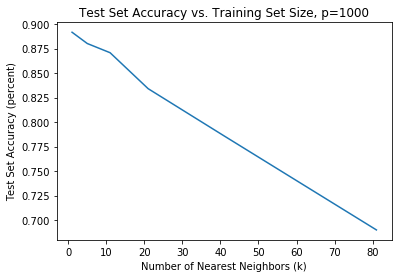

In [26]:
# Plot your graph exploring the relationship between the training set size and performance for k=10, p=1000.
# Remember that the following things are required for each graph: x/y axes labels, title, legend (if multiple data 
# series)

### BEGIN SOLUTION

x_val = list(performance_dict.keys())
x_val = [x for x in x_val]
y_val = [performance_dict[k] for k in performance_dict]

plt.plot(x_val, y_val)
plt.title("Test Set Accuracy vs. Training Set Size, p=1000")
plt.xlabel("Number of Nearest Neighbors (k)")
plt.ylabel("Test Set Accuracy (percent)")
plt.show()

### END SOLUTION

Write your analysis here (2-3 sentances). No more than a short paragraph. Include in your analysis some reasoning for $k$'s effect on the trend of the graph.


### BEGIN SOLUTION
**Ans:** The plot reveals a small $k$ maximizes performance. Student should apply some reasoning related to how $k$ affects the decision boundary. For raw pixels in the standard euclidean norm, the first nearest neighbors are more likely to be of the same class (because often in the dataset, you can find two digits that are nearly overlapping), but further neighbors are less and less likely to have the same label relatively quickly (i.e. k >5). This is both because of our choice of feature space (it is highly likely that, for example, 1 and 7 could be very close) and a consequence of the dimensionality. There is also the roll of the prototypes in that fewer prototypes results in a less representative set, but we would still have to apply some of the above reasoning to explain why 1000 prototypes are not enough to prevent performance decrease.


Sommon common point loss situations (not comprehensive):

-1 pt if student said "it overfits" without explanation. Overfitting is not the best term to use here.

-1 pt if student said because for 80 nearest neighbors, we are goint to far away. This doesn't explain why the graph has a downward trend from 1 to 80. 

Average score on this question is 1. Full points were awarded for both having a convincing answer and use of correct terminology.

### END SOLUTION

**Part C**: Now we fix $k=10$ and explore the relationship between the values of $p$ and performance.

The procedure is the same as part A: Fill in the code to build and test the models, fill in the code to plot the graph, then write your explanation/analysis.

(Note that for your own testing, you can try arbitray list of `p_vals` below. But when you turn this notebook in, p_vals should be set to the original values:
```
p_vals = [10, 100, 500, 1000]
```

In [27]:
p_vals = [10, 100, 500, 1000]
k = 10
performance_dict = {}

for num_proto in p_vals:
    ### BEGIN SOLUTION
    # Build the model.
    print("Building model.")
    model, x_proto, y_proto = build_model(data.train_x, 
                                          data.train_y, 
                                           k, num_proto)

    # Make predictions on test set.
    print("Making predictions on test set (size: {})".format(data.test_x.shape))
    pred_y = model.predict(data.test_x)

    # Create confusion matrix
    print("Generating confusion matrix.")
    confusion_matrix = get_confusion_matrix(data.test_y, pred_y, np.arange(10))

    # Get accuracy
    print("Storing results.")
    acc = get_accuracy(confusion_matrix)
    performance_dict[num_proto] = acc
    ### END SOLUTION
    
    print ("k: {}, p: {}, Accuracy : {}".format(k, num_proto,
            100 * performance_dict[num_proto]))

Building model.
Making predictions on test set (size: (10000, 784))
Generating confusion matrix.
Storing results.
k: 10, p: 10, Accuracy : 11.35
Building model.
Making predictions on test set (size: (10000, 784))
Generating confusion matrix.
Storing results.
k: 10, p: 100, Accuracy : 58.8
Building model.
Making predictions on test set (size: (10000, 784))
Generating confusion matrix.
Storing results.
k: 10, p: 500, Accuracy : 81.28
Building model.
Making predictions on test set (size: (10000, 784))
Generating confusion matrix.
Storing results.
k: 10, p: 1000, Accuracy : 87.15


{10: 0.1135, 100: 0.588, 500: 0.8128, 1000: 0.8715}


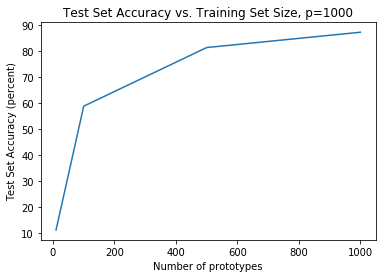

In [28]:
# Plot your graph exploring the relationship between the number of prototypes and test set performance for k=10

### BEGIN SOLUTION
print(performance_dict)
x_val = list(performance_dict.keys())
x_val = [x for x in x_val]
y_val = [performance_dict[k]*100 for k in performance_dict]

plt.plot(x_val, y_val)
plt.title("Test Set Accuracy vs. Training Set Size, p=1000")
plt.xlabel("Number of prototypes")
plt.ylabel("Test Set Accuracy (percent)")
plt.show()

### END SOLUTION

Write your analysis here (2-3 sentances). No more than a short paragraph.

Be sure to comment on any tradeoffs (between complexity, performance, etc.) if any.


### BEGIN SOLUTION
**Ans:** Student should comment that more prototypes increase performance, but the incrased performance comes at the cost of higher runtime complexity. They should note that increased prototypes are more likely to be more representative of the dataset. 


-1 pt for not mentioning the runtime/accuracy trade off
### END SOLUTION

### Perceptron - 10 points
***
Consider the IRIS dataset discussed in lecture. We have created a binary classification problem to determine whether a given flower is a setosa or not. To create this, we pre-processed the labels to create a label vector where setosa’s label is unchanged (i.e. its label is 1), but both versicolor and virginica are now labeled as -1. The data contains two out of the four attributes, petal width and petal length. This training data and the modified labels can be loaded using `IrisM` class. We are going to use this dataset for training a Perceptron classifier in subsequent problems. 

In [29]:
# We are setting the PRN seed for repeatability - do not change this cell.
np.random.seed(12345)

In [30]:
class IrisM:
    """
    Class to store modified iris data for Perceptron Training
    """
    
    def __init__(self):
        iris = load_iris()
        
        # only taking first two features
        X = iris.data[:, :2]
        y = iris.target[:]
        
        # only considering whether it is setosa or not
        y[iris.target != 0] = -1
        y[iris.target == 0] = 1
        mask = np.random.choice(a = [False, True], size = 150, p = (0.66, 1 - 0.66))
        
        self.train_x, self.train_y = X[mask], y[mask]
        self.test_x, self.test_y = X[~mask], y[~mask]

iris = IrisM()

The functions below implement te Perceptron classifier. Note that in our case the model is completely specified by the weight vector `theta`. We will build the model from scratch, so instead of passing around a Scikit-Learn object, we will instead return `theta` from the build_perceptron model and pass that to the prediction functions. The labels for the examples are -1 or 1. This is a simple preceptron classifier seen in class where the linear separator passes through the origin i.e has offset parameter = 0. Your tasks are as following:

### Implement build_perceptron_model

The first task is to implement the below method `build_perceptron_model`. It takes a matrix `train_X` of training examples (one per row) and a vector `train_y`. Note that `train_X` could have an arbitrary number of columns (you cannot assume it is the same as the number of features in `iris`. 

This function should perform the `perceptron` iterative training process described in class and return `theta`, the weight vector, as well as `epoch`, the total number of cycles through the data required during the training process. Break from the training loop when either:
1. You reach 200 epochs or 
2. You cycled through the data without any misclassifications

Follow the function spec. Note again, we give you some example sanity tests, but your code will be tested against other tests and looked at overall for correctness.

In [31]:
def build_perceptron_model(train_X, train_y):
    '''
    Returns 'theta', the weights of the Perceptron
    classifier.
    
    Args:
        train_X: (numpy array) the training features,
        train_y: (numpy array) the training labels
        
    Returns:
        theta : (numpy array) the weight vector of the trained perceptron model
        epochs: (int) the number of cycles through the dataset required to converge.
    '''
    theta = np.zeros_like(train_X[0])
    iter_count = 0
    epochs = 1
    ### BEGIN SOLUTION
    while True:
        print("Starting training epoch {}".format(epochs))
        converged = True
        for i in range(train_y.shape[0]):
            dot_val = train_X[None, i, :].dot(theta.T)
            if train_y[i]*dot_val <= 0:
                converged = False
                theta = theta + train_y[i]*train_X[i]
        if(converged):
            break
        epochs += 1
    ### END SOLUTION
    return theta, epochs

In [32]:
# Sanity tests for build_perceptron_model
test_x = np.array([[1, 0], [0, 1]])
test_y = np.array([1, -1])
test_t, test_epochs = build_perceptron_model(test_x, test_y)
assert(test_epochs == 2)

Starting training epoch 1
Starting training epoch 2


### Implement the prediction/inference function

Below, implement `predict_perceptron` according to the specification. Note that like the Scikit-Learn classes, your class should accept a `np.ndarray` with each row corresponding to an example. It should output a vector of predicted labels. 

In [33]:
def predict_perceptron(theta: np.ndarray, data_X : np.ndarray):
    '''
    Predicts the labels on the data 'data_x' 
    using a perceptron with weights defined by 'theta'
    '''
    predicted_y = np.zeros((data_X.shape[0]))
    ### BEGIN SOLUTION
    predicted_y = data_X.dot(theta)
    predicted_y[predicted_y > 0] = 1
    predicted_y[predicted_y <= 0]= -1
    ### END SOLUTION
    return predicted_y

In [34]:


# Sanity tests for predict_perceptron
test_x = np.array([[1, 0], [0, 1]])
test_y = np.array([1, -1])
test_valid_x = np.array(([5, 0], [0, 10]))
test_t, test_epochs = build_perceptron_model(test_x, test_y)
test_pred_y = predict_perceptron(test_t, test_valid_x)
assert(test_epochs == 2)

### BEGIN HIDDEN TESTS

'''
Reversing where the "or equal to" inequality went will cause test failure below, but is still OK
'''

### END HIDDEN TESTS

Starting training epoch 1
Starting training epoch 2


### Implement the get_margin function

Below, implement a function which acccepts a `theta` weight vector for the perceptron model and a set of training examples `train_X`. It should return the "margin" of the classifier as we defined in class. 

In [52]:
def get_margin(theta: np.ndarray, train_X, train_y):
    '''
    Returns the geometric margin of the classifier on the given 
    training set. 'train_X' is assumed to be the same 'train_X'
    used in the 'build_perceptron_model' function.
    
    args:
        theta: np.ndarray: weight vector for perceptron
        train_X: the np.ndarray representing the feature vectors. 
    '''
    ### BEGIN SOLUTION
    ans = np.abs(np.dot(train_X, theta))
    assert(ans.shape[0] == train_X.shape[0])
    return np.min(ans)/ np.linalg.norm(theta)
    ### END SOLUTION
    return None

In [53]:



# Sanity checks for perceptron.
# Sanity tests for predict_perceptron
test_x = np.array([[1, 0], [0, 1]])
test_y = np.array([1, -1])
test_valid_x = np.array(([5, 0], [0, 10]))
test_t, test_epochs = build_perceptron_model(test_x, test_y)
margin = get_margin(test_t, test_x, test_y)
print(margin)
assert(margin < 1)


### BEGIN HIDDEN TESTS

'''
points deducted if you had the wrong equation here (equation was given in Piazza announcement.)

points were deducted either from here or the last question
'''

### END HIDDEN TESTS

Starting training epoch 1
Starting training epoch 2
0.7071067811865475


In [63]:
# Do not remove this cell.

### BEGIN HIDDEN TESTS
import unittest

class TestPerceptron(unittest.TestCase):
    def setUp(self):
        self.x = np.array([[1, 2], [4, 5], [2, 1], [5, 4]])
        self.y = np.array([+1, +1, -1, -1])
        self.p_theta, _ = build_perceptron_model(self.x, self.y)
        self.queries = np.array([[1, 5], [0, 3], [6, 4], [2, 2]])

    def test0(self):
        """
        Test Perceptron
        """
        print(self.p_theta.shape)
        print(self.queries.shape)
        est = predict_perceptron(self.p_theta, self.queries)
        print(np.dot(self.queries, self.p_theta))
        print(est)
        self.assertEqual(est[0],  1)
        self.assertEqual(est[1],  1)
        self.assertEqual(est[2], -1)
        self.assertEqual(est[3], -1)
        
tests = TestPerceptron()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)

### END HIDDEN TESTS

.

Starting training epoch 1
Starting training epoch 2
(2,)
(4, 2)
[ 4  3 -2  0]
[ 1  1 -1 -1]



----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

### Evaluating Perceptron

Now, we are going to using `IrisM` dataset to train a perceptron using `Perceptron` class.

**Part A:** From class we know that this data is linearly separable but the separator does not pass through the origin. Therefore you will need to follow the technique used in lecture to further pre-process the data to be linearly separable through the origin: for each data point, add an additional feature, set to a constant value (please use the value 1 for consistency).

In [55]:
def append_constant_feature(train_X):
    '''
    Takes a dataset (less labels) 'train_X' and returns a 
    modified version of the dataset with another feature set to a constant '1'
    '''
    modified_dataset = train_X
    ### BEGIN SOLUTION
    ones = np.ones((train_X.shape[0], 1))
    modified_dataset = np.concatenate((train_X, ones), axis = 1)
    ### END SOLUTION
    return modified_dataset

In [56]:
### Sanity check (note that this will expose problems in your 
# previous functions if they can't except arbitrary number of features)
# You should converge in less than 100 epochs.
test_x = np.array([[0, 10], [0, 5]])
test_y = np.array([1, -1])
test_valid_x = np.array(([5, 0], [0, 10]))
test_x = append_constant_feature(test_x)
assert(test_x.shape[1] == 3)
test_t, test_epochs = build_perceptron_model(test_x, test_y)
assert(test_epochs < 100)

Starting training epoch 1
Starting training epoch 2
Starting training epoch 3
Starting training epoch 4
Starting training epoch 5
Starting training epoch 6
Starting training epoch 7
Starting training epoch 8
Starting training epoch 9
Starting training epoch 10
Starting training epoch 11
Starting training epoch 12
Starting training epoch 13
Starting training epoch 14
Starting training epoch 15
Starting training epoch 16
Starting training epoch 17
Starting training epoch 18
Starting training epoch 19
Starting training epoch 20
Starting training epoch 21
Starting training epoch 22
Starting training epoch 23
Starting training epoch 24
Starting training epoch 25
Starting training epoch 26
Starting training epoch 27
Starting training epoch 28
Starting training epoch 29
Starting training epoch 30
Starting training epoch 31
Starting training epoch 32
Starting training epoch 33
Starting training epoch 34
Starting training epoch 35
Starting training epoch 36
Starting training epoch 37
Starting t

### Train Perceptron on the Iris Dataset

Now that we have the ability to produce a modified dataset, train the Perceptron classifier on the iris dataset loaded in the class above. 

Have your code print out the number of epochs (number of times it cycled through the entire dataset) until convergence. 

In [57]:
### BEGIN SOLUTION
iris_x = append_constant_feature(iris.train_x)
iris_y = iris.train_y
theta, num_epoch = build_perceptron_model(iris_x, iris_y)

print("Complete, number of epochs {}".format(num_epoch))
### END SOLUTION

Starting training epoch 1
Starting training epoch 2
Starting training epoch 3
Starting training epoch 4
Starting training epoch 5
Starting training epoch 6
Starting training epoch 7
Starting training epoch 8
Starting training epoch 9
Starting training epoch 10
Starting training epoch 11
Starting training epoch 12
Starting training epoch 13
Complete, number of epochs 13


What is the angle between Perceptron's classification vector `theta` found above and vector $(1, 0, 1)^T$? Report your answer in radians.

In [69]:
### BEGIN SOLUTION
v = np.array([1, 0, 1])
cosang = np.dot(v, theta)
singang = np.linalg.norm(np.cross(v, theta))
print (np.arctan2(singang, cosang))
### END SOLUTION

'''
points deducted if you used np.radians at the end and changed your answer
to something incorrect. 

There are other formulas, e.g. arccos( dot(theta,v)/(norm(theta)*norm(v)))
'''

1.8275449960552022


'\npoints deducted if you used np.radians at the end and changed your answer\nto something incorrect. \n'

Report the accuracy on the test set. Be sure to do the same feature modifications to the test set as the training set. (Reuse the theta vector from above, don't re-fit the model in this cell.)

In [59]:
### BEGIN SOLUTION
# Full points if their accuracy is somewhere around 90%. If not, they did something wrong.
test_x = append_constant_feature(iris.test_x)
predict = predict_perceptron(theta, test_x)
print("Accuracy:", np.sum(predict == iris.test_y)*100 / len(iris.test_y))
### END SOLUTION

Accuracy: 97.89473684210526


Report the geometric margins of your classifier with respect to the `IrisM` dataset used. Recall that the distance of a point $x_t$ from the line/surface $\theta^T x = 0$ is $|\frac{\theta^Tx_t}{||x||}|$

In [67]:
### BEGIN SOLUTION
# Full points if they report the margin
np.abs(get_margin(theta, append_constant_feature(iris.test_x), iris.test_y))

### END SOLUTION


### BEGIN HIDDEN TESTS
''' Answers 
also accepted for reports on test or train, as it wasnt specified
'''

### END HIDDEN TESTS

' Answers \nalso accepted for reports on test or train, as it wasnt specified\n'